# Elec

In [1]:
import pandas as pd
"""
This script performs the following operations:

1. Imports necessary libraries and modules.
2. Reads a CSV file containing electricity consumption data into a pandas DataFrame.
3. Preprocesses the data using a custom preprocessing function.
4. Combines the training and validation sets.
5. Prints the shapes of the normalized training, validation, and test sets.

Functions:
    preprocess_data(df): 
        Preprocesses the input DataFrame and returns normalized training, validation, and test sets.

Variables:
    df (pd.DataFrame): 
        DataFrame containing the electricity consumption data read from the CSV file.
    output_names (list): 
        List containing the name of the output variable.
    X_train_normalized (np.ndarray): 
        Normalized training feature set.
    y_train_normalized (np.ndarray): 
        Normalized training target set.
    X_val_normalized (np.ndarray): 
        Normalized validation feature set.
    y_val_normalized (np.ndarray): 
        Normalized validation target set.
    X_test_normalized (np.ndarray): 
        Normalized test feature set.
    y_test_normalized (np.ndarray): 
        Normalized test target set.
    X_train_val_normalized (np.ndarray): 
        Combined normalized training and validation feature set.
    y_train_val_normalized (np.ndarray): 
        Combined normalized training and validation target set.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'/home/lixna37/Downloads/FDCSs_Feb_2024/Datasets/FDCS_1/FDCS_1_Elec_Feb_2024.csv')

output_names = ['Electricity Consumption']

from FDCS_1_Elec_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1272, 35)
Shape of y_train_normalized: (1272, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (1608, 35)
Shape of y_train_val_normalized: (1608, 1)


In [2]:
from FDCS_1_models_Dataset_size import run_model
"""
This script runs a model on a normalized test dataset and returns the predictions.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names):
        Runs the model using the provided training and test datasets and returns the predictions.

Variables:
    pred_true_test_set: The predictions and true values for the test set.

Usage:
    Ensure that the necessary datasets (X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized) 
    and output names (output_names) are defined before running this script.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set


Execution time: 367.05 seconds


,Model,TrainSize,RMSE,True_Electricity Consumption,Pred_Electricity Consumption
0,RandomForestRegressor,24,0.181679,0.018988,0.095396
1,RandomForestRegressor,24,0.181679,0.019199,0.095396
2,RandomForestRegressor,24,0.181679,0.023504,0.095396
3,RandomForestRegressor,24,0.181679,0.018734,0.095396
4,RandomForestRegressor,24,0.181679,0.016716,0.095396
...,...,...,...,...,...
45019,XGBRegressor,1608,0.072344,0.350507,0.258954
45020,XGBRegressor,1608,0.072344,0.317073,0.282758
45021,XGBRegressor,1608,0.072344,0.372739,0.283135
45022,XGBRegressor,1608,0.072344,0.227587,0.210947


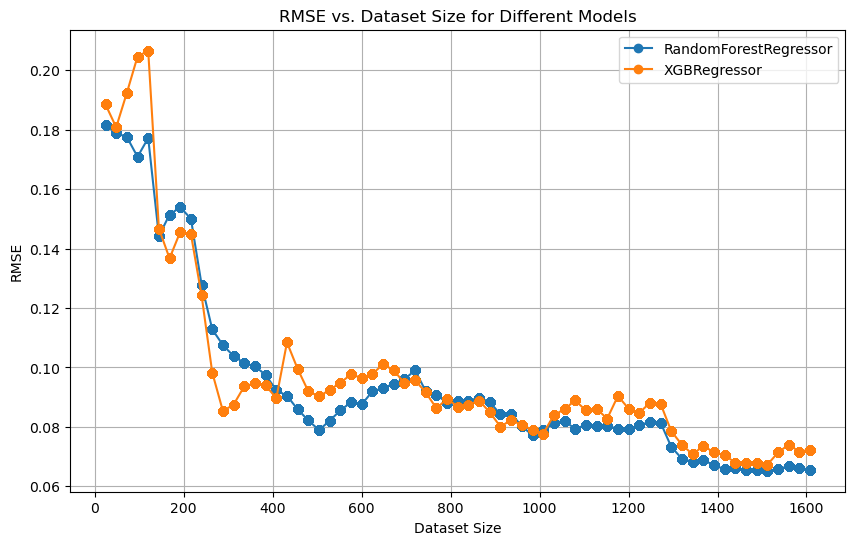

In [3]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import joblib
"""
This script performs the following operations:
1. Imports necessary libraries: joblib and pandas.
2. Loads a pre-trained scaler from a joblib file.
3. Applies inverse transformation to the true and predicted electricity consumption values in the test set.
4. Saves the transformed test set to a CSV file.

Functions:
- No functions are defined in this script.

Variables:
- scaler_y_loaded: The loaded scaler object.
- pred_true_test_set: DataFrame containing true and predicted electricity consumption values.

Filepaths:
- scaler_y_elec.joblib: Path to the saved scaler file.
- pred_true_test_set_elec_dataset_size.csv: Path to save the transformed test set CSV file.
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_elec.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Electricity Consumption'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Electricity Consumption']])
pred_true_test_set['Pred_Electricity Consumption'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Electricity Consumption']])
pred_true_test_set.to_csv('pred_true_test_set_elec_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Electricity Consumption,Pred_Electricity Consumption
0,RandomForestRegressor,24,0.181679,172.61,440.611054
1,RandomForestRegressor,24,0.181679,173.35,440.611054
2,RandomForestRegressor,24,0.181679,188.45,440.611054
3,RandomForestRegressor,24,0.181679,171.72,440.611054
4,RandomForestRegressor,24,0.181679,164.64,440.611054
...,...,...,...,...,...
45019,XGBRegressor,1608,0.072344,1335.41,1014.289257
45020,XGBRegressor,1608,0.072344,1218.14,1097.780640
45021,XGBRegressor,1608,0.072344,1413.39,1099.104634
45022,XGBRegressor,1608,0.072344,904.27,845.903524


# Temp

In [1]:
import pandas as pd
"""
This script performs the following operations:

1. Imports necessary libraries: pandas, numpy, and warnings.
2. Reads a CSV file into a pandas DataFrame.
3. Defines the output names for the dataset.
4. Imports a preprocessing function from an external module.
5. Preprocesses the data using the imported function to obtain normalized training, validation, and test sets.
6. Combines the training and validation sets into a single set.
7. Prints the shapes of the training, validation, and test sets, as well as the combined training and validation set.

Functions:
    preprocess_data(df): Preprocesses the input DataFrame and returns normalized training, validation, and test sets.

Variables:
    df (pd.DataFrame): The DataFrame containing the dataset read from the CSV file.
    output_names (list): List containing the names of the output variables.
    X_train_normalized (np.ndarray): Normalized training features.
    y_train_normalized (np.ndarray): Normalized training labels.
    X_val_normalized (np.ndarray): Normalized validation features.
    y_val_normalized (np.ndarray): Normalized validation labels.
    X_test_normalized (np.ndarray): Normalized test features.
    y_test_normalized (np.ndarray): Normalized test labels.
    X_train_val_normalized (np.ndarray): Combined normalized training and validation features.
    y_train_val_normalized (np.ndarray): Combined normalized training and validation labels.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'/home/lixna37/Downloads/FDCSs_Feb_2024/Datasets/FDCS_1/FDCS_1_Temp_Feb_2024.csv')

output_names = ['Temperature Closer to Evaporator (C)']

from FDCS_1_Temp_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1272, 35)
Shape of y_train_normalized: (1272, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (1608, 35)
Shape of y_train_val_normalized: (1608, 1)


In [2]:
from FDCS_1_models_Dataset_size import run_model
"""
This script runs a model on a normalized dataset and returns the predictions and true values for the test set.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names):
        Runs the model using the provided training and test datasets and returns the predictions and true values for the test set.

Variables:
    pred_true_test_set: The predictions and true values for the test set obtained from running the model.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set


Execution time: 311.18 seconds


,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.165065,0.303235,0.575519
1,RandomForestRegressor,24,0.165065,0.460916,0.627545
2,RandomForestRegressor,24,0.165065,0.516173,0.688282
3,RandomForestRegressor,24,0.165065,0.528302,0.735448
4,RandomForestRegressor,24,0.165065,0.516173,0.737896
...,...,...,...,...,...
45019,XGBRegressor,1608,0.067915,0.314016,0.285138
45020,XGBRegressor,1608,0.067915,0.212938,0.250569
45021,XGBRegressor,1608,0.067915,0.168464,0.249187
45022,XGBRegressor,1608,0.067915,0.168464,0.243887


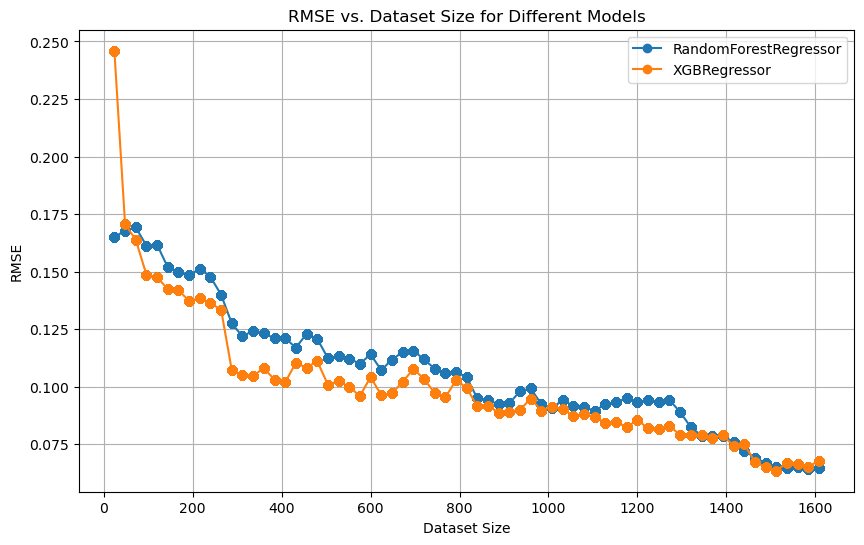

In [3]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
pred_true_test_set

,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.165065,0.303235,0.575519
1,RandomForestRegressor,24,0.165065,0.460916,0.627545
2,RandomForestRegressor,24,0.165065,0.516173,0.688282
3,RandomForestRegressor,24,0.165065,0.528302,0.735448
4,RandomForestRegressor,24,0.165065,0.516173,0.737896
...,...,...,...,...,...
45019,XGBRegressor,1608,0.067915,0.314016,0.285138
45020,XGBRegressor,1608,0.067915,0.212938,0.250569
45021,XGBRegressor,1608,0.067915,0.168464,0.249187
45022,XGBRegressor,1608,0.067915,0.168464,0.243887


In [6]:
import joblib
"""
This script performs the following operations:

1. Imports necessary libraries: `joblib` for loading the scaler and `pandas` for data manipulation.
2. Loads a pre-trained scaler from a file named 'scaler_y_temp.joblib'.
3. Applies the inverse transformation to the true and predicted temperature values in the test set.
4. Saves the transformed test set to a CSV file named 'pred_true_test_set_temp_dataset_size.csv'.

Functions:
- None

Variables:
- scaler_y_loaded: The loaded scaler object.
- pred_true_test_set: DataFrame containing the true and predicted temperature values.

Filepaths:
- 'scaler_y_temp.joblib': Filepath to the saved scaler.
- 'pred_true_test_set_temp_dataset_size.csv': Filepath to save the transformed test set.

Note:
- Ensure that `pred_true_test_set` DataFrame is defined and contains the columns 'True_Temperature Closer to Evaporator (C)' and 'Pred_Temperature Closer to Evaporator (C)' before running this script.
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_temp.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Temperature Closer to Evaporator (C)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Temperature Closer to Evaporator (C)']])
pred_true_test_set['Pred_Temperature Closer to Evaporator (C)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Temperature Closer to Evaporator (C)']])
pred_true_test_set.to_csv('pred_true_test_set_temp_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Temperature Closer to Evaporator (C),Pred_Temperature Closer to Evaporator (C)
0,RandomForestRegressor,24,0.165065,11.75,13.770348
1,RandomForestRegressor,24,0.165065,12.92,14.156381
2,RandomForestRegressor,24,0.165065,13.33,14.607052
3,RandomForestRegressor,24,0.165065,13.42,14.957023
4,RandomForestRegressor,24,0.165065,13.33,14.975191
...,...,...,...,...,...
45019,XGBRegressor,1608,0.067915,11.83,11.615723
45020,XGBRegressor,1608,0.067915,11.08,11.359219
45021,XGBRegressor,1608,0.067915,10.75,11.348966
45022,XGBRegressor,1608,0.067915,10.75,11.309645


# Humd

In [2]:
import pandas as pd
"""
This script performs the following tasks:
1. Imports necessary libraries and modules.
2. Reads a CSV file containing humidity data.
3. Preprocesses the data using a custom preprocessing function.
4. Combines the training and validation sets.
5. Prints the shapes of the normalized datasets.

Functions:
    preprocess_data(df): Preprocesses the input DataFrame and returns normalized training, validation, and test sets.

Variables:
    df (pd.DataFrame): DataFrame containing the humidity data read from the CSV file.
    output_names (list): List containing the name of the output variable.
    X_train_normalized (np.ndarray): Normalized training features.
    y_train_normalized (np.ndarray): Normalized training labels.
    X_val_normalized (np.ndarray): Normalized validation features.
    y_val_normalized (np.ndarray): Normalized validation labels.
    X_test_normalized (np.ndarray): Normalized test features.
    y_test_normalized (np.ndarray): Normalized test labels.
    X_train_val_normalized (np.ndarray): Combined normalized training and validation features.
    y_train_val_normalized (np.ndarray): Combined normalized training and validation labels.
"""
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(r'/home/lixna37/Downloads/FDCSs_Feb_2024/Datasets/FDCS_1/FDCS_1_Humd_Feb_2024.csv')

output_names = ['Humidity Closer to Evaporator (%)']

from FDCS_1_Humd_pre_processing import preprocess_data
X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, X_test_normalized, y_test_normalized = preprocess_data(df)

# Combine the training and validation sets directly after they have been recalled
X_train_val_normalized = np.concatenate([X_train_normalized, X_val_normalized], axis=0)
y_train_val_normalized = np.concatenate([y_train_normalized, y_val_normalized], axis=0)

print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of y_train_normalized:", y_train_normalized.shape)
print("Shape of X_val_normalized:", X_val_normalized.shape)
print("Shape of y_val_normalized:", y_val_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)
print("Shape of y_test_normalized:", y_test_normalized.shape)
print("Shape of X_train_val_normalized:", X_train_val_normalized.shape)
print("Shape of y_train_val_normalized:", y_train_val_normalized.shape)

Shape of X_train_normalized: (1272, 35)
Shape of y_train_normalized: (1272, 1)
Shape of X_val_normalized: (336, 35)
Shape of y_val_normalized: (336, 1)
Shape of X_test_normalized: (336, 35)
Shape of y_test_normalized: (336, 1)
Shape of X_train_val_normalized: (1608, 35)
Shape of y_train_val_normalized: (1608, 1)


In [3]:
from FDCS_1_models_Dataset_size import run_model
"""
This script runs a model on a normalized dataset and returns the predictions and true values for the test set.

Functions:
    run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names): 
        Runs the model on the provided training and test datasets and returns the predictions and true values for the test set.

Variables:
    pred_true_test_set: 
        A variable that stores the predictions and true values for the test set after running the model.
"""
pred_true_test_set = run_model(X_train_val_normalized, y_train_val_normalized, X_test_normalized, y_test_normalized, output_names)
pred_true_test_set

Execution time: 352.06 seconds


,Model,TrainSize,RMSE,True_Humidity Closer to Evaporator (%),Pred_Humidity Closer to Evaporator (%)
0,RandomForestRegressor,24,0.239939,0.443696,0.638391
1,RandomForestRegressor,24,0.239939,0.331408,0.624449
2,RandomForestRegressor,24,0.239939,0.299326,0.586528
3,RandomForestRegressor,24,0.239939,0.270132,0.573755
4,RandomForestRegressor,24,0.239939,0.248637,0.579358
...,...,...,...,...,...
45019,XGBRegressor,1608,0.092962,0.462624,0.355531
45020,XGBRegressor,1608,0.092962,0.307347,0.338370
45021,XGBRegressor,1608,0.092962,0.505294,0.337743
45022,XGBRegressor,1608,0.092962,0.582932,0.342563


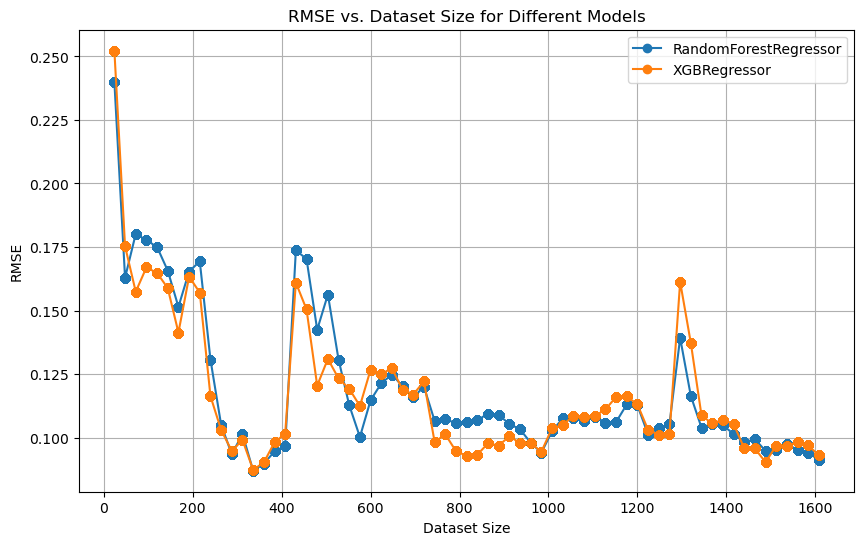

In [4]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))

for model_name in pred_true_test_set['Model'].unique():
    subset = pred_true_test_set[pred_true_test_set['Model'] == model_name]
    plt.plot(subset['TrainSize'], subset['RMSE'], marker='o', label=model_name)

plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.title('RMSE vs. Dataset Size for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
pred_true_test_set

,Model,TrainSize,RMSE,True_Humidity Closer to Evaporator (%),Pred_Humidity Closer to Evaporator (%)
0,RandomForestRegressor,24,0.239939,0.443696,0.638391
1,RandomForestRegressor,24,0.239939,0.331408,0.624449
2,RandomForestRegressor,24,0.239939,0.299326,0.586528
3,RandomForestRegressor,24,0.239939,0.270132,0.573755
4,RandomForestRegressor,24,0.239939,0.248637,0.579358
...,...,...,...,...,...
45019,XGBRegressor,1608,0.092962,0.462624,0.355531
45020,XGBRegressor,1608,0.092962,0.307347,0.338370
45021,XGBRegressor,1608,0.092962,0.505294,0.337743
45022,XGBRegressor,1608,0.092962,0.582932,0.342563


In [6]:
import joblib
"""
This script performs the following operations:

1. Imports necessary libraries: `joblib` for loading the scaler and `pandas` for data manipulation.
2. Loads a pre-trained scaler from a file named 'scaler_y_humd.joblib'.
3. Applies the inverse transformation to the true and predicted humidity values closer to the evaporator.
4. Saves the transformed dataset to a CSV file named 'pred_true_test_set_humd_dataset_size.csv'.

Functions:
    None

Variables:
    scaler_y_loaded (object): The loaded scaler object.
    pred_true_test_set (DataFrame): The DataFrame containing the true and predicted humidity values.

Filepath:
    /home/lixna37/Downloads/FDCSs_Paper/FDCSs_Paper/FDCS_1/dataset_size_analysis.ipynb
"""
import pandas as pd
# Load the saved scaler
scaler_y_loaded = joblib.load('scaler_y_humd.joblib')
# Apply inverse transformation to the true and predicted values
pred_true_test_set['True_Humidity Closer to Evaporator (%)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['True_Humidity Closer to Evaporator (%)']])
pred_true_test_set['Pred_Humidity Closer to Evaporator (%)'] = scaler_y_loaded.inverse_transform(pred_true_test_set[['Pred_Humidity Closer to Evaporator (%)']])
pred_true_test_set.to_csv('pred_true_test_set_humd_dataset_size.csv', index=False)
pred_true_test_set

,Model,TrainSize,RMSE,True_Humidity Closer to Evaporator (%),Pred_Humidity Closer to Evaporator (%)
0,RandomForestRegressor,24,0.239939,75.08,81.148647
1,RandomForestRegressor,24,0.239939,71.58,80.714076
2,RandomForestRegressor,24,0.239939,70.58,79.532071
3,RandomForestRegressor,24,0.239939,69.67,79.133949
4,RandomForestRegressor,24,0.239939,69.00,79.308602
...,...,...,...,...,...
45019,XGBRegressor,1608,0.092962,75.67,72.331897
45020,XGBRegressor,1608,0.092962,70.83,71.797008
45021,XGBRegressor,1608,0.092962,77.00,71.777443
45022,XGBRegressor,1608,0.092962,79.42,71.927685
